In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from analysis.constants import * # All access constants in here
from analysis.plotting import *
from analysis.estimators import Linear_Observer

### Load Data

In [6]:
box_data = pad_fd(dict(np.load("one_drone_box_fd.npz")))
no_box_data = pad_fd(dict(np.load("one_drone_no_box_fd.npz")))

### Plot force estimates for experiment without box

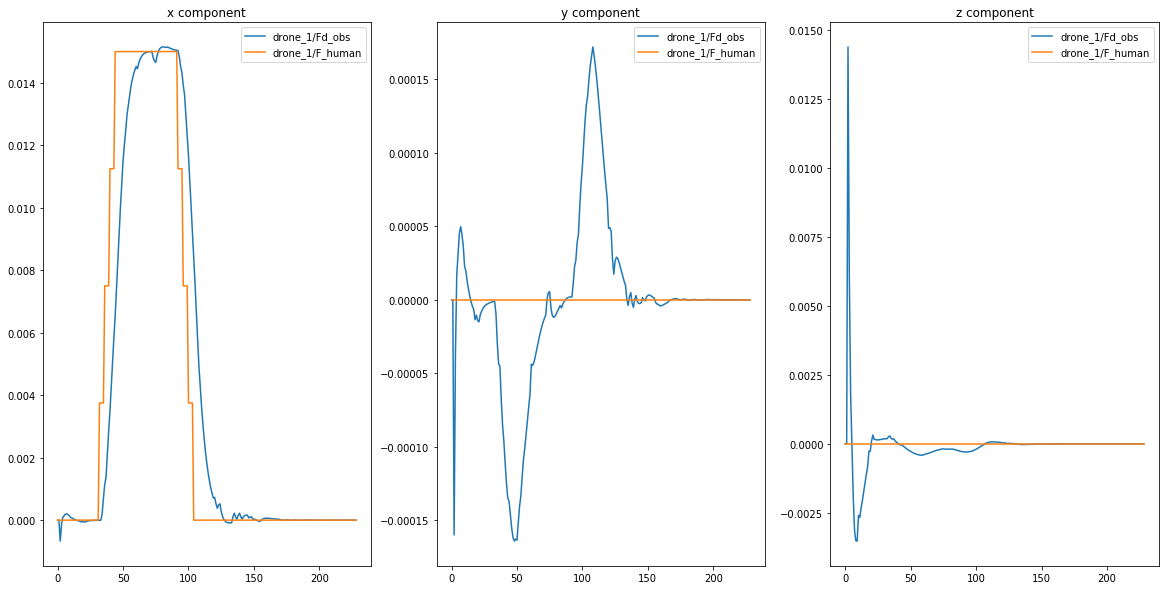

In [7]:
topics = ["drone_1/Fd_obs", "drone_1/F_human"]
plot_vectors(no_box_data[topics[0]], no_box_data[topics[1]], names=topics)

### Plot data for experiment with box

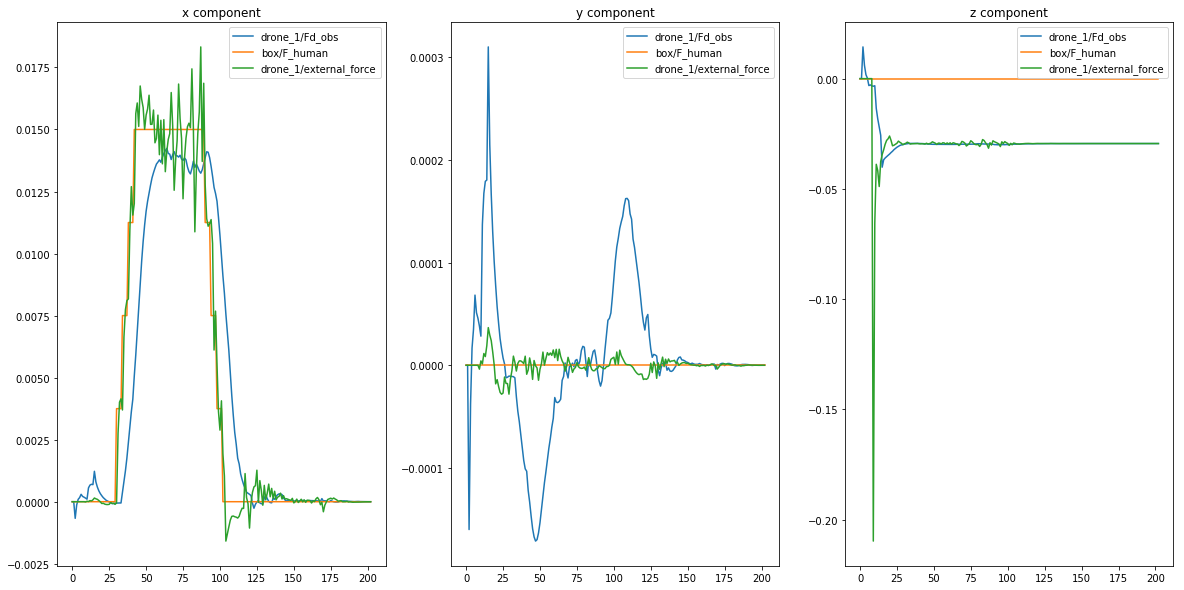

In [8]:
topics = ["drone_1/Fd_obs", "box/F_human", "drone_1/external_force"]
plot_vectors(box_data[topics[0]], box_data[topics[1]], box_data[topics[2]], names=topics)

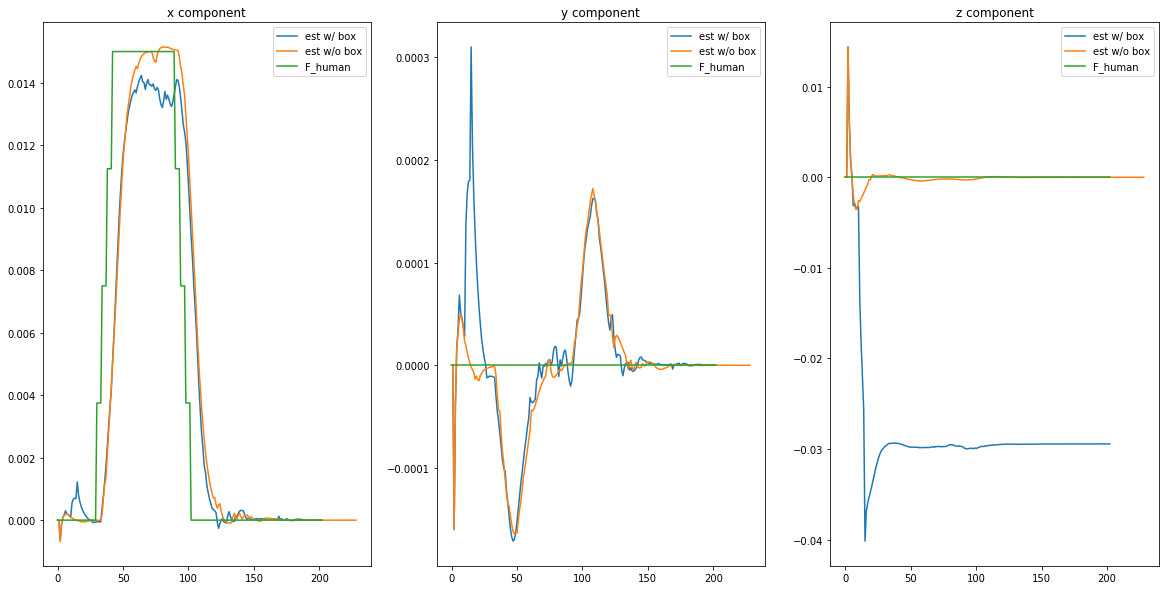

In [9]:
names = ["est w/ box", "est w/o box", "F_human"]
plot_vectors(box_data["drone_1/Fd_obs"], no_box_data["drone_1/Fd_obs"], box_data["box/F_human"], names=names)

### Angle between the Drone and the Box

In [18]:
drone_pos = box_data["drone_1/position"]
box_pos = box_data["box/position"]
z = np.array([0,0,-1])
angles = [ np.arccos( np.dot(box_pos[i,1:4] - drone_pos[i,1:4], z) / np.linalg.norm(box_pos[i,1:4] - drone_pos[i,1:4]))
          for i in range(drone_pos.shape[0])]
angles = np.array(angles) * (180/np.pi)

C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


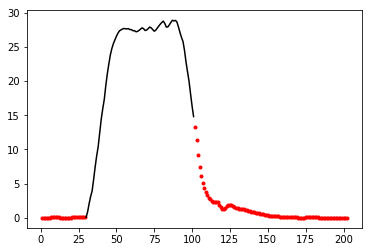

In [30]:
idx1 = box_data["box/F_human"][:,1] == 0
idx2 = box_data["box/F_human"][:,1] != 0
tstamps = np.arange(box_data["box/F_human"].shape[0])
plt.plot(tstamps[idx1], angles[idx1], 'r.')
plt.plot(tstamps[idx2], angles[idx2], 'k')

In [27]:
tstamps

range(0, 203)